<a href="https://colab.research.google.com/github/TrushaT/Data-Science-/blob/main/DS_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Trusha Talati  
UID: 2018130054

EXP 2 - Implementing PCA


#### Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that some columns have no null values which need to be handled. But the cell above shows that the dataset contains values coded as '?'.

In [ ]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (32561, 15)


The dataset has 32561 rows and 15 columns

In [ ]:
df.dtypes.value_counts()

object    9
int64     6
dtype: int64

9 columns are categorical and the rest 6 are numeric columns

In [ ]:
# Encoding '?' values as null values
df[df == '?'] = np.nan

In [ ]:
nan_per = df.isna().sum()/len(df)*100

In [ ]:
nan_per

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

Columns like workclass, occupation,and native country have null values

### Data PreProcessing

 Handling missing values

In [ ]:
#categorical columns therefore handling missing values by mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
#checking if missing values are handled 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df2 = df #for running purposes 

In [ ]:
df2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df2['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

 Converting categorical columns to numeric using label encoding - workclass,education,marital status, occupation, relationship, race,sex, native country, income 

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country','income']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df2[feature] = le.fit_transform(df2[feature])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


### Exploratory Data Analysis

In [ ]:
df['income'].value_counts() # Target Variable

0    24720
1     7841
Name: income, dtype: int64

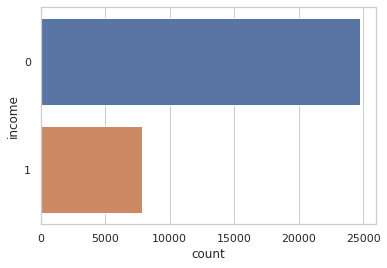

In [ ]:
# count plot along y axis
sns.countplot(y ='income', data = df)
plt.show()

In this <=50k income have more values than >50k. 

To understand how other features influence the target variable - income, we need to find correlation. 

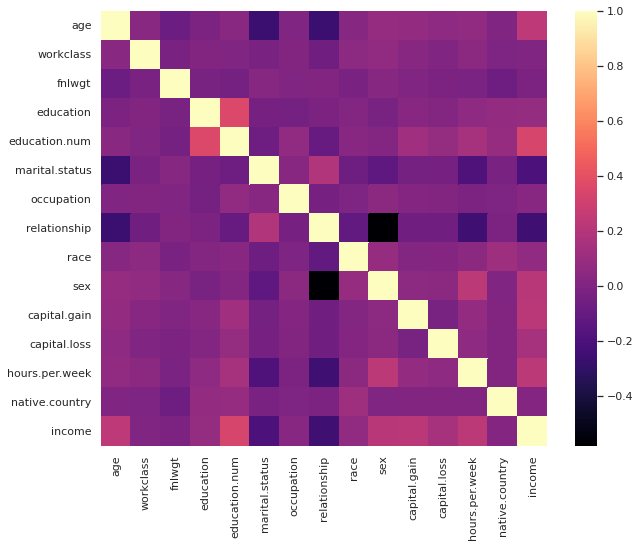

In [ ]:
df_corr = df2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,cmap='magma')

In [ ]:
df_corr['income'].sort_values(ascending=False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
education         0.079317
race              0.071846
occupation        0.034625
native.country    0.023058
workclass         0.002693
fnlwgt           -0.009463
marital.status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

Columns like education.num,age , capital.gain,sex are highly correlated

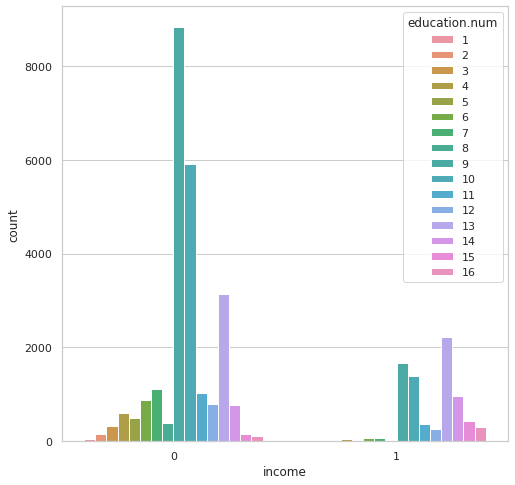

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='income', hue='education.num')

Observation - lower the values of education.num lower the income 

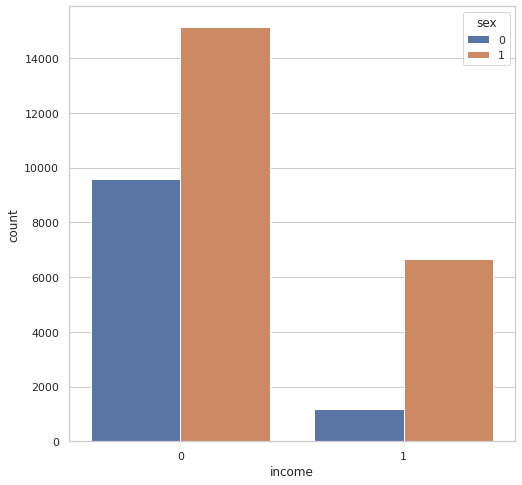

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='income', hue='sex')

Observation - male employees have more income than female 

The maximum age is 90
The minimum age is 17


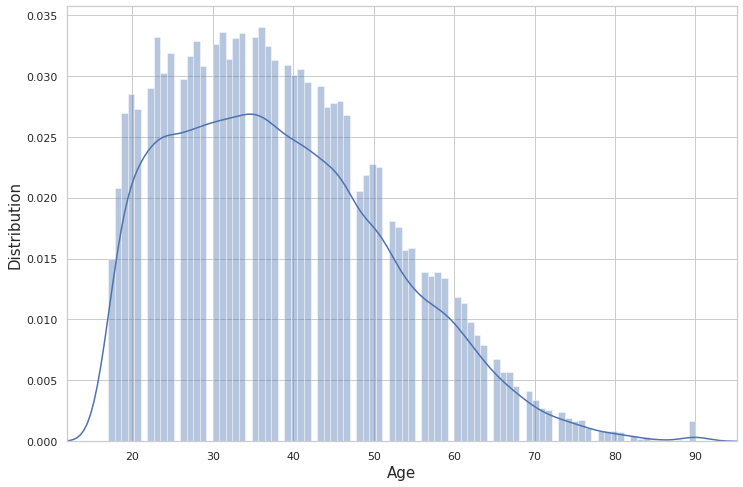

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90)
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

Observation - employess between age 25-40 have higher incomes 

Feature Scaling using Standard Scaler

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)

In [ ]:
df3.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137,-0.563199
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137,-0.563199
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137,-0.563199
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137,-0.563199
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137,-0.563199


### Model Selection/Training

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Test split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.7893


Without PCA the model gives an **accuracy** of **78.93%**

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
explained_variance_ratio

array([9.94984847e-01, 5.00096637e-03, 1.41494257e-05, 1.67339295e-08,
       1.32727864e-08, 3.25779927e-09, 1.45210148e-09, 1.38311288e-09,
       4.52633743e-10, 2.17077274e-10, 1.73664412e-10, 1.09032690e-10,
       6.16495972e-11, 1.22660156e-11])

Above we can see the explained variance ratio of each principal component. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [ ]:
explained_variance_ratio[:-1].sum()*100

99.99999999877336

Thus we can observe that last column carries little information due to its less contribution to the variance.  

#### Logistic Regression using only first 13 variables

In [ ]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8213


After using PCA, keeping first 13 variables, the model gives an **accuracy** of **82.13%**. We can see that the accuracy increased.

#### Logistic Regression using only first 12 variables

In [ ]:
X = df.drop(['income','native.country','hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8227


After using PCA, keeping first 12 variables, the model gives an **accuracy** of **82.27%**. We can see that the accuracy increased.

Model Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
print('Classification Report\n',classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7410
           1       0.72      0.43      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Confusion Matrix
 [[7012  398]
 [1334 1025]]
Accuracy: 0.8227044733340158


Accuracy of 82.27 is observed 




#### Computing the minimum number of dimensions required to preserve 90% of the training set variance

In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


#### Plotting cumulative explained variance vs the number of dimensions 

An alternative option is to plot the explained variance as a function of the number of dimensions. In the plot, we should look for an elbow where the explained variance stops growing fast. This can be thought of as the intrinsic dimensionality of the dataset.

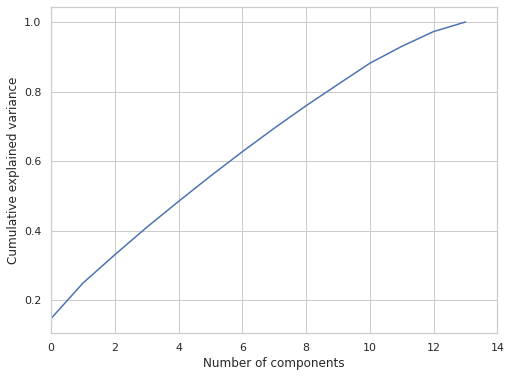

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The plot shows that almost 90% of variance is explained by the first 12 components.

#### PCA keeping only 12 components

In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


pca = PCA(12)
pca.fit(X_train)
# access values and vectors
pca_components = pca.components_
print('Eigen Vectors:\n',pca_components)
print('Eigen Values:\n',pca.explained_variance_)

Eigen Vectors:
 [[ 3.17104903e-01  1.09075376e-01 -5.00794765e-02  1.06175944e-01
   2.10063637e-01 -3.34890542e-01  2.94832578e-02 -5.40978653e-01
   1.68492082e-01  4.70331199e-01  1.40363966e-01  1.20997604e-01
   3.69473872e-01  5.92094826e-02]
 [ 8.13484138e-02  3.60205398e-02  1.45474086e-01 -6.08661264e-01
  -6.07041594e-01  1.46630574e-02  8.82657122e-03 -2.12942113e-01
  -3.86943891e-02  2.83317485e-01 -1.53172111e-01 -7.67499255e-02
  -5.65766791e-02 -2.68323941e-01]
 [-4.43799644e-01 -2.07950977e-02  4.62523885e-01  1.26087740e-01
   2.09736972e-01  3.98385098e-01  3.51708880e-01 -1.45420021e-01
  -2.09500293e-01  2.89333131e-01  1.11666541e-01  3.87568976e-04
   1.40058924e-01 -2.56020454e-01]
 [ 3.41265824e-01 -1.79750734e-01  3.78542917e-02  2.35753516e-02
   8.36074113e-02 -2.83176701e-01 -3.25509212e-02  9.44272430e-02
  -5.92170277e-01 -1.91686614e-01  2.81706961e-01 -2.27927666e-02
   9.38697828e-02 -5.25341797e-01]
 [ 8.66193179e-02  4.41223804e-01 -1.87471667e-01 -1

In [ ]:
transformed_X_train = pca.transform(X_train)
print('Projection of the original matrix:\n',transformed_X_train)

Projection of the original matrix:
 [[-1.74453448 -1.44372786 -2.16422698 ...  0.04136948  0.08763314
  -0.49169461]
 [ 0.62223658  0.49117863  0.13352266 ... -0.47499948  0.36967462
  -0.38769783]
 [-0.64701057 -1.08115659 -0.39157213 ... -0.60731136  0.39256223
   1.03646263]
 ...
 [-0.81413697  1.67337571  0.77139075 ...  0.98860416 -1.56954208
   0.04683507]
 [ 1.46535949 -0.93546551 -0.39705611 ... -0.64164019  0.40521065
  -0.0545075 ]
 [ 0.9935644   0.36895764 -0.17597071 ... -0.64144046  0.05838336
  -0.46921897]]


In [ ]:
transformed_X_test = pca.transform(X_test)

In [ ]:
len(transformed_X_test[0])

12

In [ ]:
logreg = LogisticRegression()
logreg.fit(transformed_X_train, y_train)
y_pred = logreg.predict(transformed_X_test)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'] # Solver algorithms used to solve logistic regression as an optimisation problem
penalty = ['l2'] # Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. It reduces parameters and shrinks (simplifies) the model. 
c_values = [100, 10, 1.0, 0.1, 0.01] # Parameter - Inverse of regularization strength and Smaller values have more regularization

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # Repeats Stratified K-Fold n times with different randomization in each repetition
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(transformed_X_train, y_train)

print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_)) # Showing the best result and saving the other results and printing them
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.824719 using {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}

0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.824661 (0.006075) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.824661 (0.006098) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.824632 (0.006118) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.824646 (0.006135) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.824690 (0.006177) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824705 (0.006162) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824661 (0.006132) with: {'C': 1.0, 'penalty': 

In [ ]:
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid_result.best_estimator_

LogisticRegression()

In [ ]:
final_model = grid_result.best_estimator_

Evaluation 

In [ ]:
pred = final_model.predict(transformed_X_test)
print('Classification Report\n',classification_report(y_test, pred))
print('Confusion Matrix\n',confusion_matrix(y_test, pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7410
           1       0.72      0.43      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.80      9769

Confusion Matrix
 [[7010  400]
 [1350 1009]]
Accuracy: 0.8208619101238612


###Conclusion - 
- From 14 features, if only first 12 are taken then the accuracy was found to be the highest(82.27%)
- Precision of 84% for target class 0 and 72% for target class 1 was obtained. 
- A recall of 95% was observed for target class 0 
- Out of 9769 test set, 7010 were correctly classified as positives(True Positive)
- Type I  error was observed for 400 test cases and Type II error for 1350 cases. 